In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\HDFCBANK.NS.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,2.421803,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,2.405575,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6562,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0
6563,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0
6564,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0
6565,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0
6566,2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976,1521.599976,5768339.0


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6560.000000,6560.000000,6560.000000,6560.000000,6560.000000,6.560000e+03
mean,337.150200,340.552696,333.371148,337.043588,328.143780,4.941709e+06
std,428.941250,432.701668,424.683662,428.705850,426.934669,5.711678e+06
min,2.435000,2.435000,2.395000,2.435000,1.975574,0.000000e+00
25%,23.799999,24.098750,23.309999,23.653751,20.443190,1.563008e+06
50%,134.424995,138.074997,130.504998,133.782501,122.550351,3.427885e+06
75%,513.462509,518.424988,509.062492,513.737488,495.121086,6.361122e+06
max,1705.000000,1725.000000,1671.000000,1688.699951,1688.699951,2.011300e+08


In [6]:
corrl =df.corr()

In [7]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [8]:
mode = df['Open'].mode()[0]
mode

22.5

In [9]:
df['Open'].fillna(mode, inplace=True)

In [10]:
mode = df['High'].mode()[0]
mode

23.200001

In [11]:
df['High'].fillna(mode, inplace=True)

In [12]:
mode = df['Low'].mode()[0]
mode

22.0

In [13]:
df['Low'].fillna(mode, inplace=True)

In [14]:
mode = df['Close'].mode()[0]
mode

3.805

In [15]:
df['Close'].fillna(mode, inplace=True)

In [16]:
mode = df['Adj Close'].mode()[0]
mode

3.087088

In [17]:
df['Adj Close'].fillna(mode, inplace=True)


In [18]:
mode = df['Volume'].mode()[0]
mode

0.0

In [19]:
df['Volume'].fillna(mode, inplace=True)

In [20]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
df.shape

(6567, 7)

In [22]:
df.duplicated().sum()

0

<AxesSubplot:>

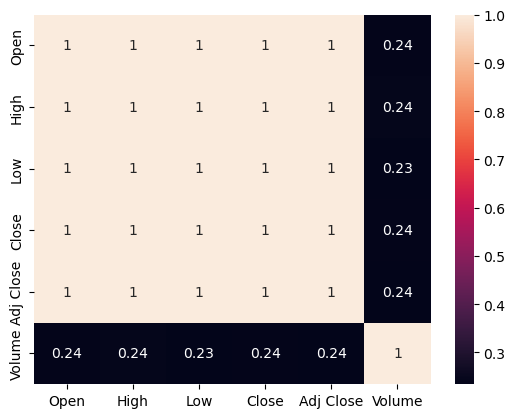

In [23]:
sns.heatmap(corrl, annot = True)

# Data visualization

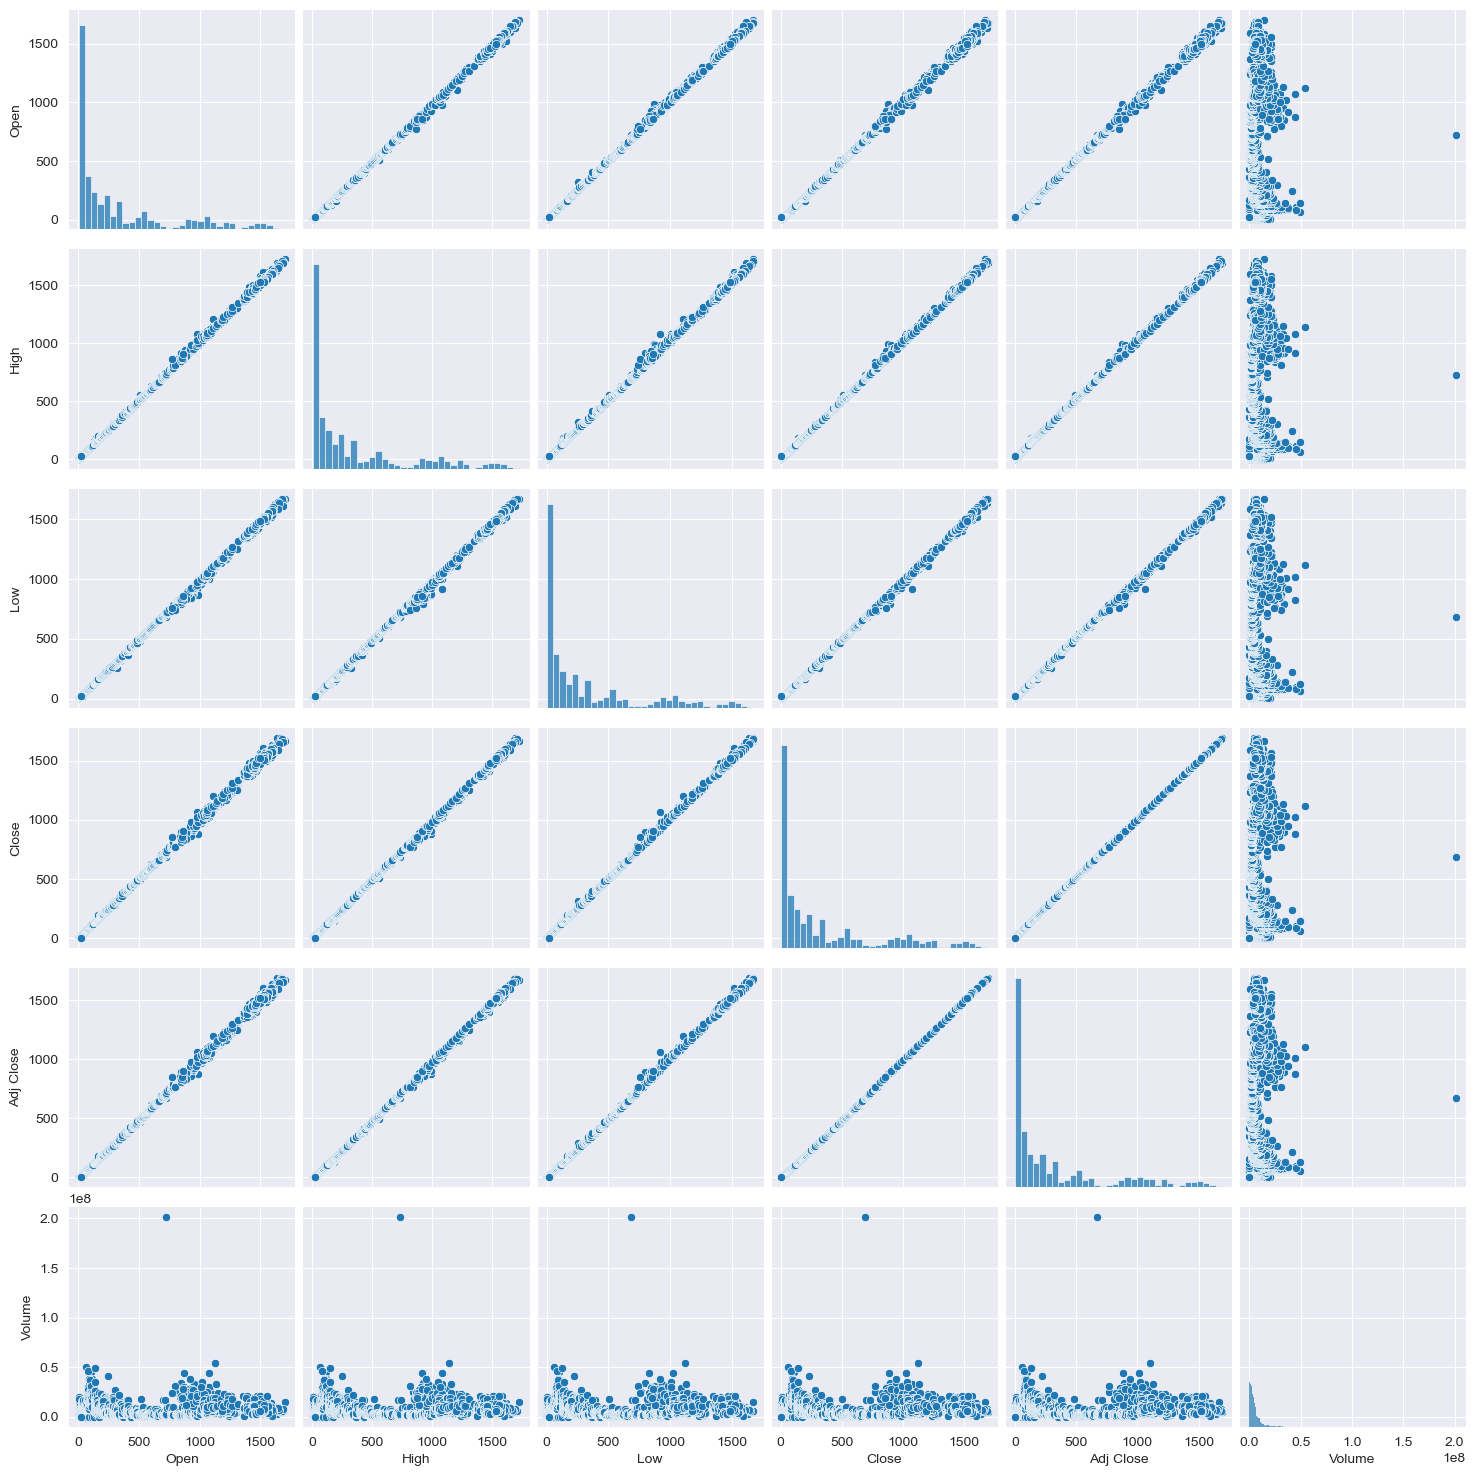

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [26]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0
1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0
1996-01-03,2.975,2.995,2.950,2.985,2.421803,284000.0
1996-01-04,2.985,2.980,2.940,2.965,2.405575,282000.0
1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0


In [27]:
df.index = pd.to_datetime(df.index)

In [28]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Text(0.5, 1.0, 'Open prices from 1996-2020')

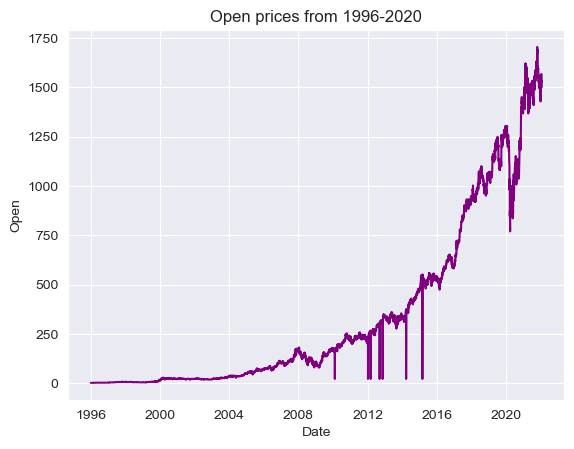

In [29]:
#line plot
sns.lineplot(x='Date',y='Open',color='purple',data= df)
plt.title('Open prices from 1996-2020')



Text(0.5, 1.0, 'Close prices from 1996-2020')

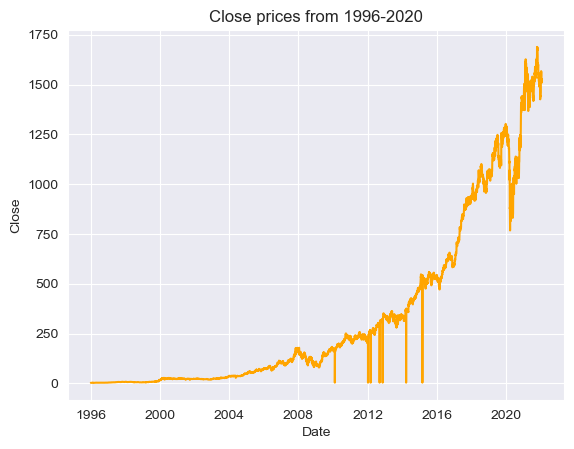

In [30]:
#line plot
sns.lineplot(x='Date',y='Close',color='orange',data= df)
plt.title('Close prices from 1996-2020')

* **from above visualization of line plot of Open and close we get to know that there is minnor difference between them by Date**.

# Data preparation

In [33]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0
1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0
1996-01-03,2.975,2.995,2.950,2.985,2.421803,284000.0
1996-01-04,2.985,2.980,2.940,2.965,2.405575,282000.0
1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0


 we are not taking Date column in the regression

In [34]:
X = df.drop('Close',axis=1)
y= df[['Close']]

* **=================================================================================================================================**

# Model Building by sklearn lib

# StandardScaler Transformation

In [35]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled,columns = X.columns)
X_scaled

,Open,High,Low,Adj Close,Volume
0,-0.778411,-0.779505,-0.777569,-0.762359,-0.803163
1,-0.778527,-0.779517,-0.777510,-0.762368,-0.792306
2,-0.778539,-0.779586,-0.777510,-0.762349,-0.814720
3,-0.778516,-0.779621,-0.777534,-0.762387,-0.815071
4,-0.778562,-0.779621,-0.777510,-0.762397,-0.831357
...,...,...,...,...,...
6562,2.782596,2.810662,2.793830,2.796825,1.148459
6563,2.789593,2.798872,2.802898,2.814983,0.216118
6564,2.791925,2.773095,2.780168,2.789679,0.389175
6565,2.778981,2.747087,2.748959,2.767538,0.466245


# Model Training

In [36]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_scaled,y)

LinearRegression()

In [37]:
linear_model.coef_

array([[-2.00771605e+02,  2.93441336e+02,  2.53684230e+02,
         8.22118634e+01,  7.39303695e-02]])

In [38]:
linear_model.intercept_

array([336.6883775])

In [39]:
y_pred = linear_model.predict(X_scaled)
y_pred

array([[   4.24074754],
       [   4.27572611],
       [   4.25762157],
       ...,
       [1524.5482507 ],
       [1509.7831015 ],
       [1517.72466726]])

In [40]:
#residuals
error = y - y_pred
error

,Close
Date,
1996-01-01,-1.260748
1996-01-02,-1.300726
1996-01-03,-1.272622
1996-01-04,-1.268637
1996-01-05,-1.286991
...,...
2022-01-17,-20.054188
2022-01-18,-11.164230
2022-01-19,-6.098300


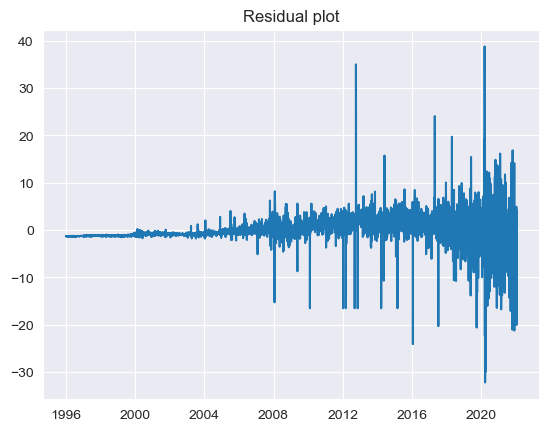

In [41]:
plt.plot(error)
plt.title('Residual plot')
plt.show()

# Model Building || Model Training Using statmodels()

In [42]:
#model fitting by using raw data
import statsmodels.formula.api as smf
model = smf.ols('Close~Open+High+Low+Volume',data=df).fit()

In [43]:
model.params

Intercept    8.976681e-02
Open        -5.706758e-01
High         8.708765e-01
Low          6.986650e-01
Volume      -3.178931e-08
dtype: float64

In [44]:
print('p-values : \n' ,model.pvalues ,'\n','t_values :\n', model.tvalues)

p-values : 
 Intercept    0.112195
Open         0.000000
High         0.000000
Low          0.000000
Volume       0.000050
dtype: float64 
 t_values :
 Intercept      1.588617
Open         -63.028000
High         109.012753
Low           90.753782
Volume        -4.056556
dtype: float64


* **The low p-values for 'Open', 'High','Low' and 'Volume' suggest that these variables have a strong and statistically significant relationship with the dependent variable 'Close'**

In [45]:
#R squared values || Adjusted R square || AIC ||BIC
def model_name(model):
    print('R-square                           : ',round(model.rsquared,4))
    print('Adjusted R-square                  : ',round(model.rsquared_adj,4))
    print('Akaike information criterion (AIC) : ',round(model.aic,4))
    print('Bayesian information criterion(BIC): ',round(model.bic,4))

In [46]:
model_name(model)

R-square                           :  0.9999
Adjusted R-square                  :  0.9999
Akaike information criterion (AIC) :  33594.4913
Bayesian information criterion(BIC):  33628.4403


* **R-squared and adjusted R-squared values are very close to 1, indicating that the independent variables are able to explain almost all of the variation in the dependent variable 'Close' and indicate that the model is overfitting the data..**

* **the AIC and BIC values are relatively low, indicating that the model is a good fit for the data.**

# Simple Linear Regression Models

In [47]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0
1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0
1996-01-03,2.975,2.995,2.950,2.985,2.421803,284000.0
1996-01-04,2.985,2.980,2.940,2.965,2.405575,282000.0
1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0


In [53]:
#SLR and MLR model for insignificant variables 'Open' and 'High'
m_op=smf.ols('Close~Volume',data=df).fit()
#t and p-Values
print(m_op.tvalues, '\n', m_op.pvalues)

Intercept    36.582386
Volume       19.877200
dtype: float64 
 Intercept    7.953598e-267
Volume        2.005514e-85
dtype: float64


In [52]:
m_hi=smf.ols('Close~High+Low',data=df).fit()
#t and p-Values
print(m_hi.tvalues, '\n', m_hi.pvalues)

Intercept    -0.051406
High         77.521465
Low          61.542428
dtype: float64 
 Intercept    0.959003
High         0.000000
Low          0.000000
dtype: float64


# Calculating VIF

In [54]:
rsq_Open=smf.ols('Open ~ High+Low+Volume',data=df).fit().rsquared
vif_Open=1/(1-rsq_Open)

rsq_High=smf.ols('High ~ Open+Low+Volume',data=df).fit().rsquared
vif_High=1/(1-rsq_High)

rsq_Low=smf.ols('Low ~ Open+High+Volume',data=df).fit().rsquared
vif_Low=1/(1-rsq_Low)

rsq_Volume=smf.ols('Volume ~ Open+High+Low',data=df).fit().rsquared
vif_Volume=1/(1-rsq_Volume)


VIF=pd.DataFrame(data=
                    {'vif_Open':[vif_Open],'vif_High':[vif_High],'vif_Low':[vif_Low],
                        'vif_Volume':[vif_Volume]
                    }
                  ).T
VIF

,0
vif_Open,10155.455263
vif_High,8045.025745
vif_Low,7196.663690
vif_Volume,1.349162


* **the VIF values for 'Open', 'High' and 'Low' are above 5 and 10, indicating that there is a high degree of multicollinearity among the independent variables. This can cause problems when interpreting the regression coefficients, as the coefficients can become unstable.**

* **having a high VIF value does not mean that the variable is not important for the model**

# Residual Analysis

# Test for normality of residuals¶

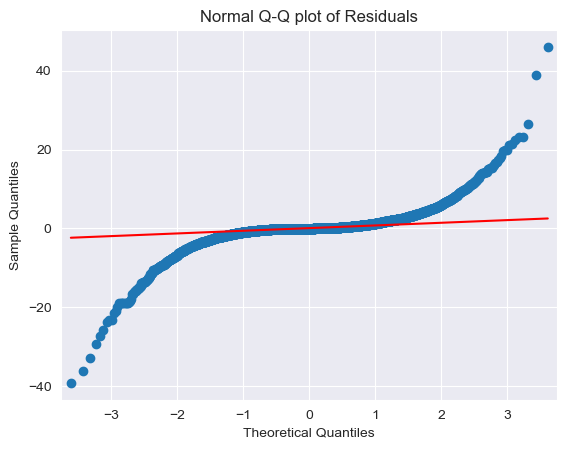

In [55]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

Maximum points are not close to striaaght line Normality condition not satisfied 

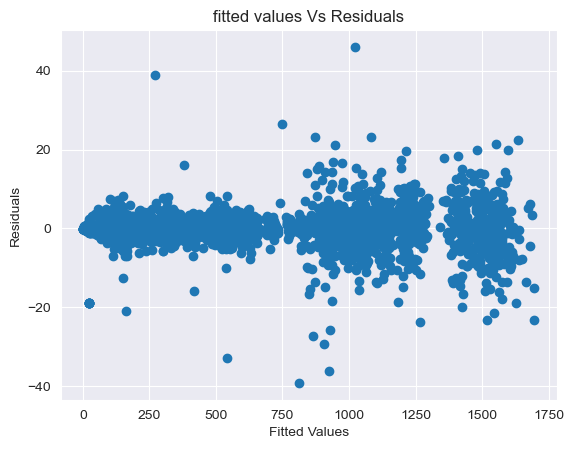

In [56]:
plt.scatter(x=model.fittedvalues,y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('fitted values Vs Residuals')
plt.grid(True)
plt.show()

here by above plot we can say that the datapoints are close towards zero,hence the assumption for Homoscedasticity satisfied

# Residual Vs Regressors

eval_env: 1


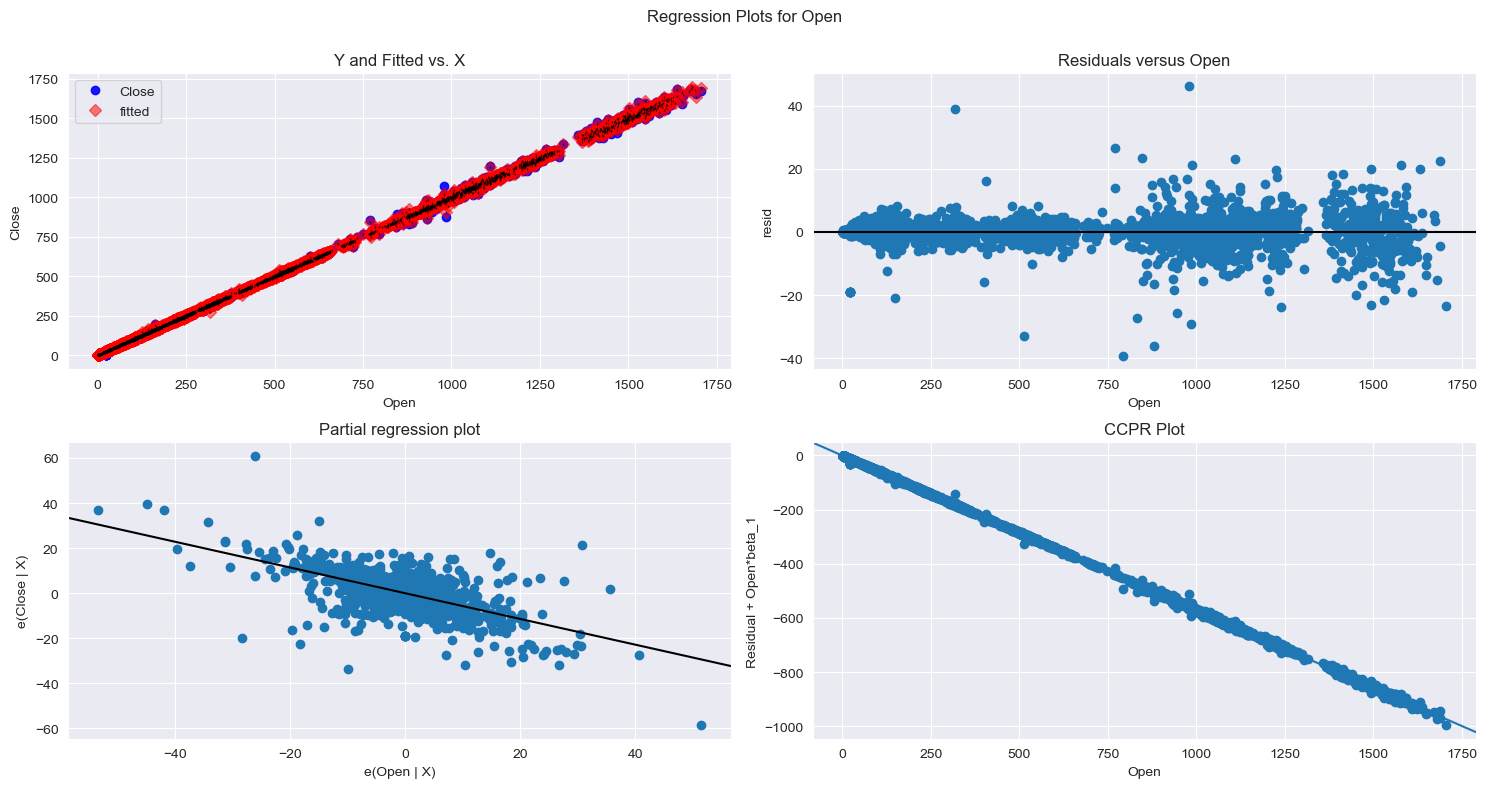

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Open", fig=fig)
plt.show()

eval_env: 1


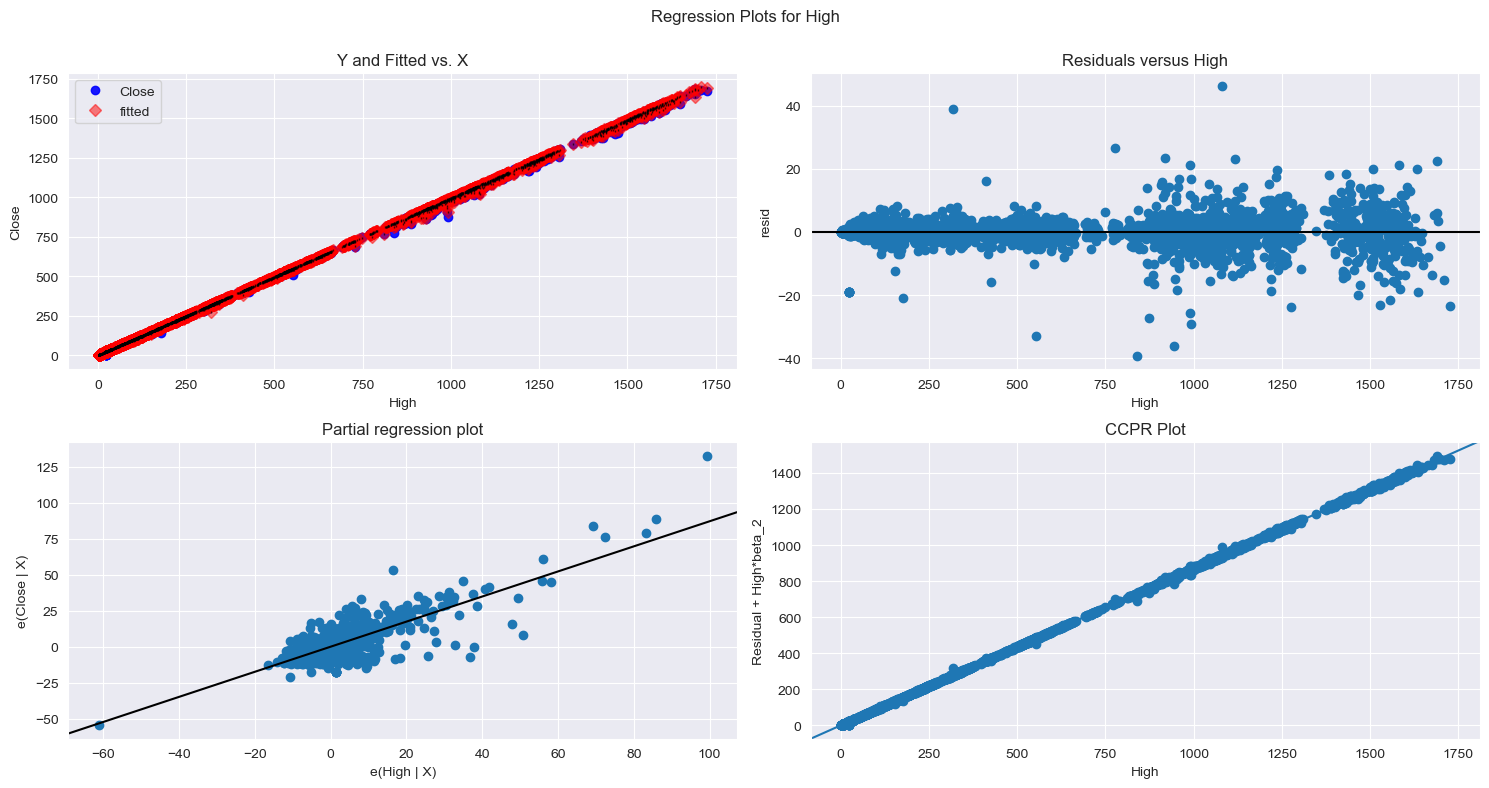

In [58]:
fig  = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"High",fig=fig)
plt.show()

eval_env: 1


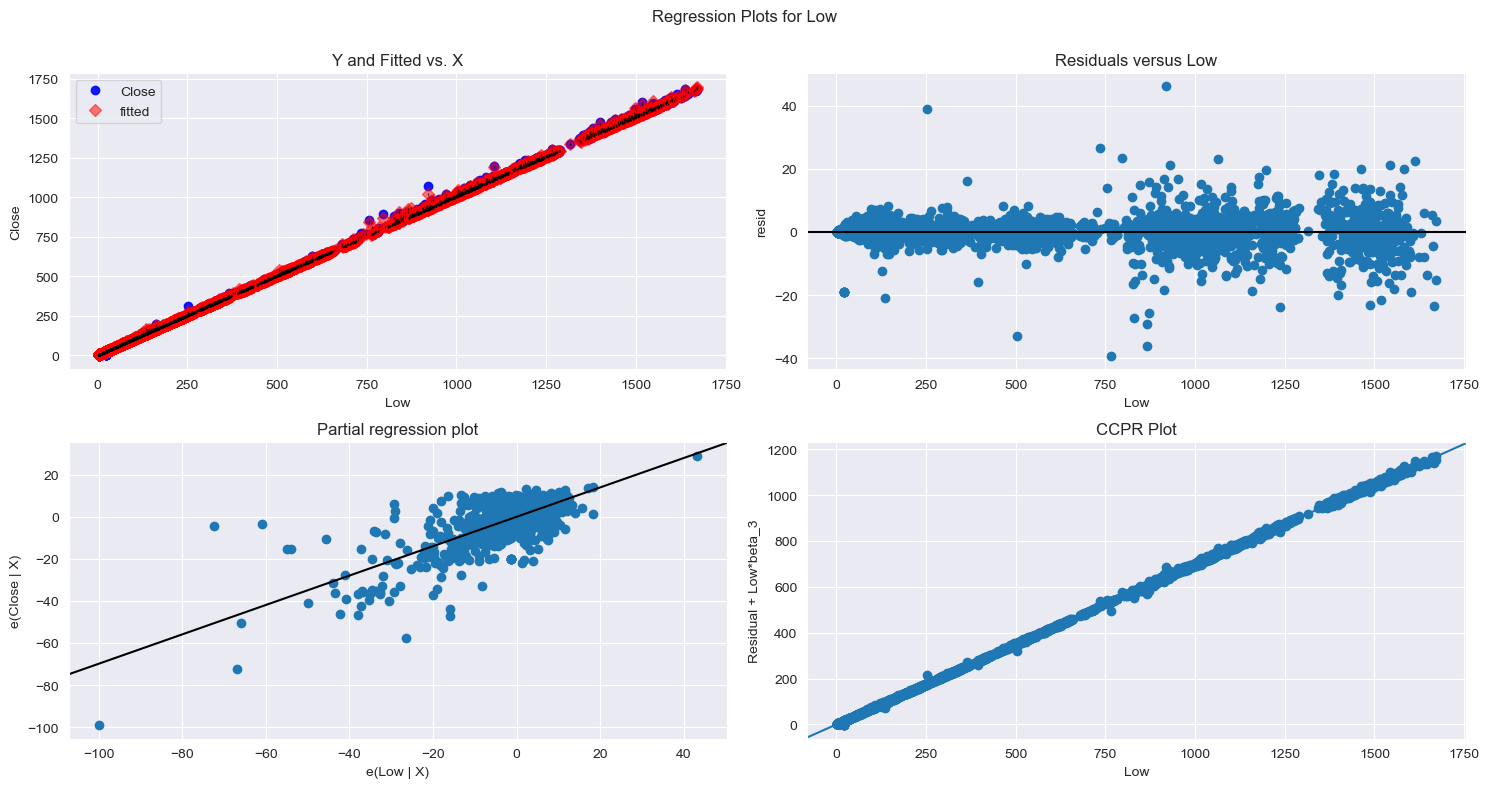

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Low",fig=fig)
plt.show()

eval_env: 1


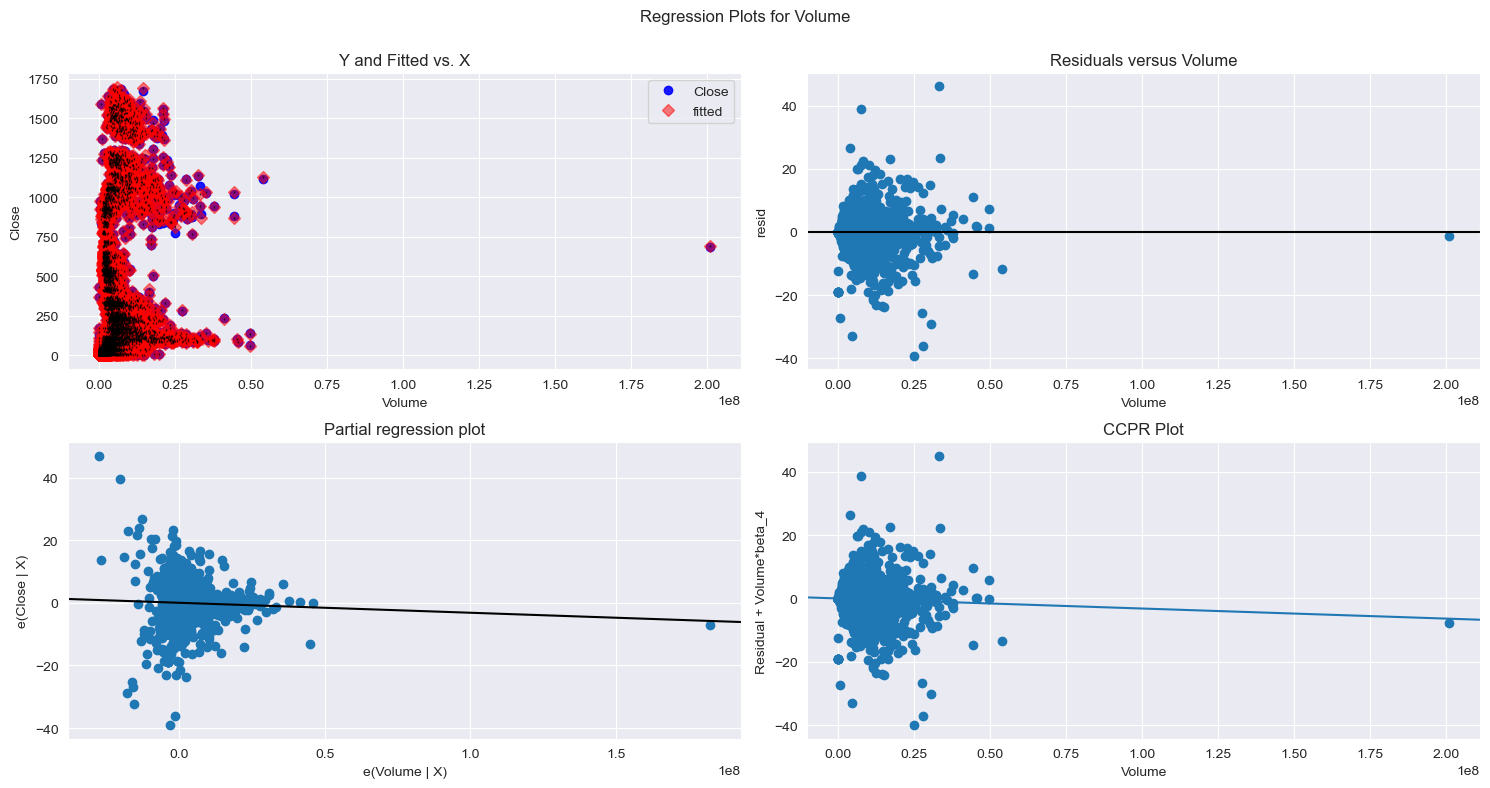

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Volume",fig = fig)
plt.show()

# Detecting Influencers/Outliers

# Cook's distance

In [61]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

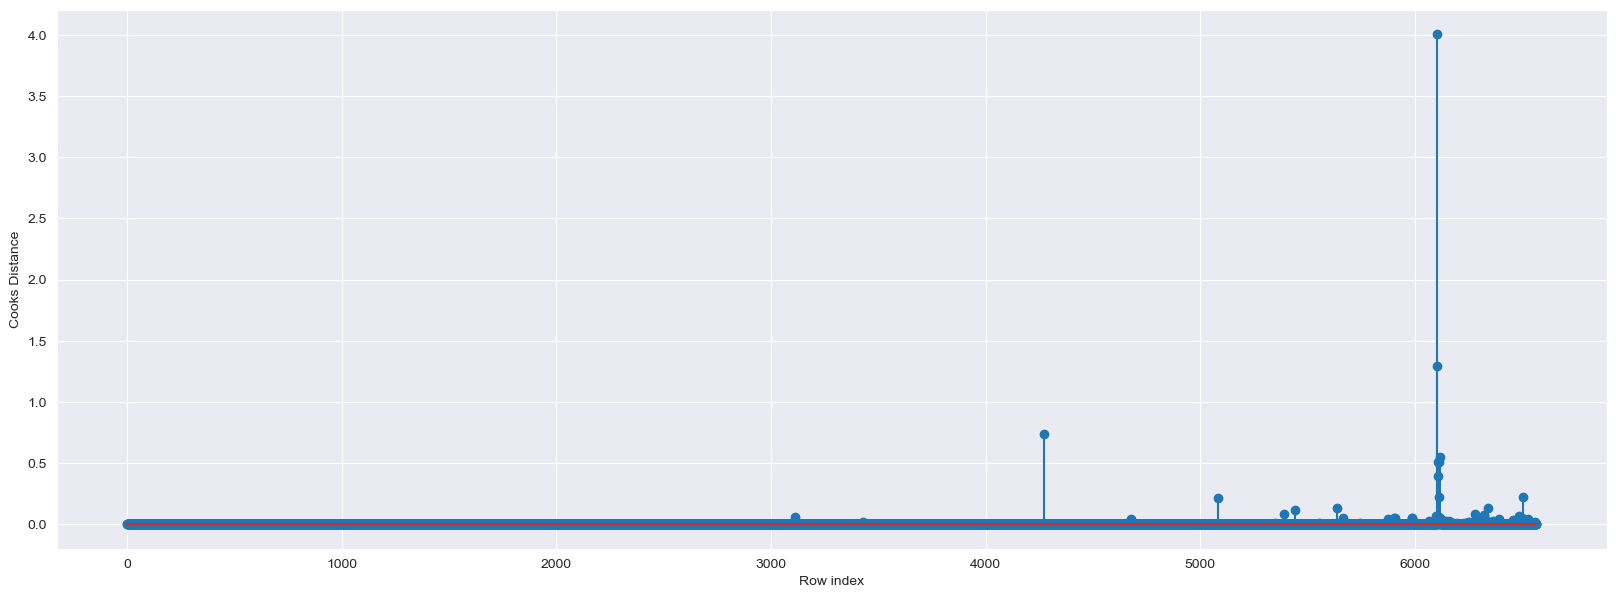

In [62]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [63]:
#index and value of influencer where c is more.
(np.argmax(c),np.max(c))

(6103, 4.005718177457193)

In [64]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Hdfc_df=df.drop(df.index[6103],axis=0).reset_index(drop=True)

In [65]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Fit your linear regression model
model = sm.OLS(y, X).fit()

# Get the influence object
influence = model.get_influence()

# Get the Cook's distance for all observations
cooks_distance = influence.cooks_distance[0]

# Find the observation with the highest Cook's distance
max_cooks_distance = cooks_distance.max()
max_cooks_distance_index = cooks_distance.argmax()

print("Observation with highest Cook's distance: ", max_cooks_distance_index)
print("Value of Cook's distance: ", max_cooks_distance)


Observation with highest Cook's distance:  6103
Value of Cook's distance:  3.8452005151694926


In [91]:
# Get the Cook's distance for all observations
cooks_distance = influence.cooks_distance[0]

# Find the observations with Cook's distance above 0.5
outliers_index = np.where(cooks_distance > 1)

# Drop the observations from the dataset
df.drop(df.index[outliers_index], inplace=True)

# Re-fit the linear regression model on the new dataset
model = sm.OLS(y, X).fit()

# Compare the original shape to the new shape
print("Number of observations dropped: ", original_shape[0] - df.shape[0])



Number of observations dropped:  28


* **Number of observation dropped is 28 because they are greater than 1 and it's likely that there are no influential observations**
* **Because the value is <1 ,we can say that there are no any outliers**

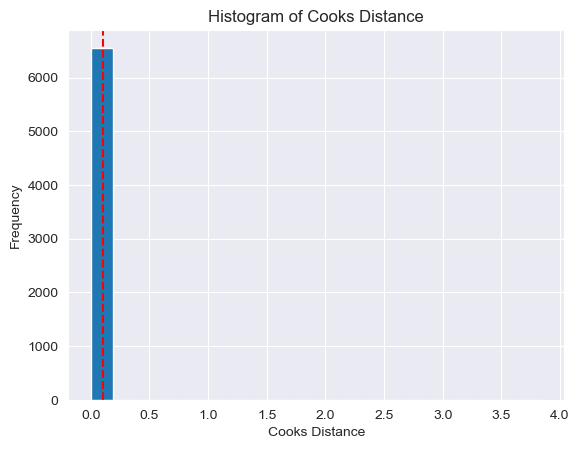

In [92]:
# Get the Cook's distance for all observations
cooks_distance = influence.cooks_distance[0]

# Plot the histogram of Cook's distance
plt.hist(cooks_distance, bins = 20)
plt.xlabel('Cooks Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Cooks Distance')

# Add the threshold value of 0.1
plt.axvline(x=0.1, color='r', linestyle='dashed')

plt.show()


# Leverage value

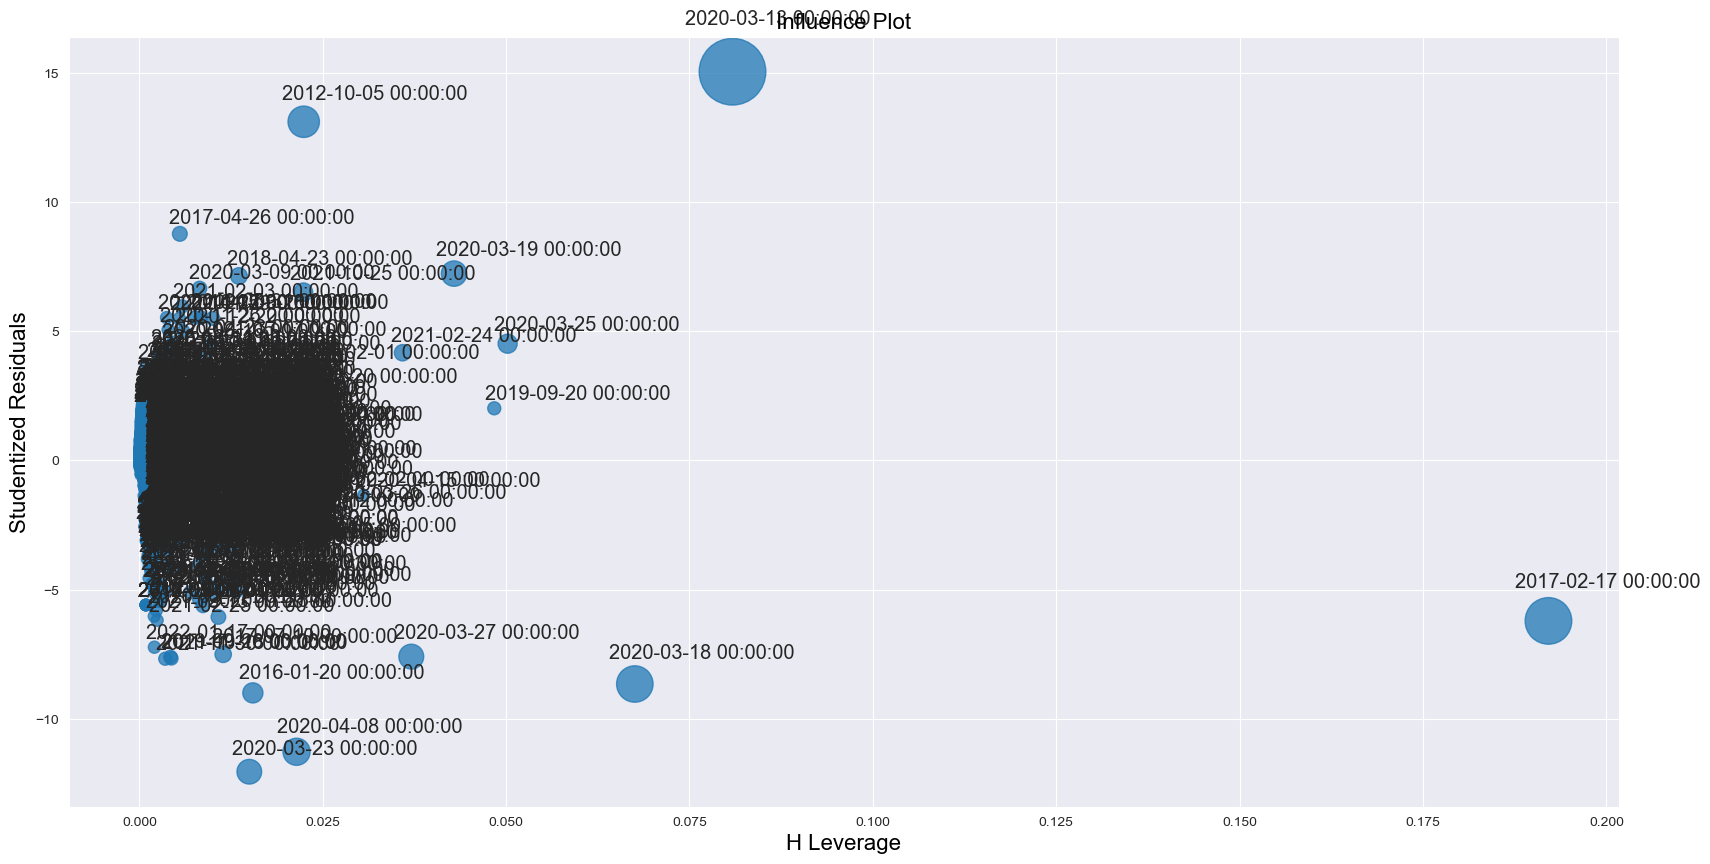

In [93]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,10))
fig=influence_plot(model,ax=ax)
plt.show()

In [94]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.0032115002293928736

In [95]:
#dropping all influencers which are present in our new data
while np.max(c)>0.1 :
    model=smf.ols('Close ~Open+High+Low+Volume',data=df).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df      
else:
    final_model=smf.ols('Close ~Open+High+Low+Volume',data=df).fit()
    print('r-square :', final_model.rsquared ,'\n' , 'AIC     :',final_model.aic)
    print('Model Accuracy is improved to :',final_model.rsquared)

r-square : 0.9999595868228988 
 AIC     : 31614.09379527146
Model Accuracy is improved to : 0.9999595868228988


In [96]:
# rechecking for influencers,if there are no influencers now then we can fit final model.
while np.max(c)>0.5 :
    model=smf.ols('Close ~Open+High+Low+Volume',data=df).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df      
else:
    final_model=smf.ols('Close ~Open+High+Low+Volume',data=df).fit()
    print('r-square :', final_model.rsquared ,'\n' , 'AIC     :',final_model.aic)
    print('Model Accuracy is improved to :',final_model.rsquared)

r-square : 0.9999595868228988 
 AIC     : 31614.09379527146
Model Accuracy is improved to : 0.9999595868228988


In [97]:
df

,Open,High,Low,Close,Adj Close,Volume
0,3.030000,3.030000,2.925000,2.980000,2.417746,350000.0
1,2.980000,3.025000,2.950000,2.975000,2.413689,412000.0
2,2.975000,2.995000,2.950000,2.985000,2.421803,284000.0
3,2.985000,2.980000,2.940000,2.965000,2.405575,282000.0
4,2.965000,2.980000,2.950000,2.960000,2.401519,189000.0
...,...,...,...,...,...,...
6537,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0
6538,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0
6539,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0
6540,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0


In [98]:
actual = df["Close"]

In [99]:
pred_values= final_model.fittedvalues
pred_values

0          3.002562
1          3.044861
2          3.023958
3          2.998371
4          3.018098
           ...     
6537    1542.714794
6538    1539.641119
6539    1522.642741
6540    1506.656975
6541    1513.334225
Length: 6539, dtype: float64

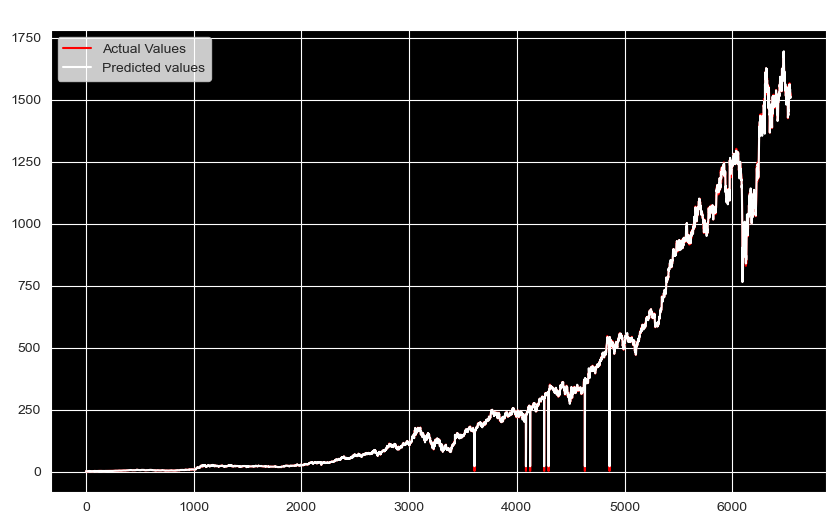

In [100]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('black')
plt.plot(actual,label='Actual Values',color='red')
plt.plot(pred_values,label='Predicted values',color='white')
plt.title('Actual & Fitted Values',color='white')
legend=plt.legend(facecolor='white')
plt.grid(True,color='white')

# Set text color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

plt.show()
